# **Not an ideal network**

Importing required libraries. Added checkpoint for storing the weight file after every 2 iterations

In [1]:
import keras
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D, Activation, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.datasets import mnist

# mount the google drive to your Colab session
from google.colab import drive
dir="/content/gdrive/My Drive/Colab Notebooks/EVA/"
drive.mount('/content/gdrive')
!ls

filepath = dir + "Weights/Session2-{epoch:02d}-{val_acc:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max', period=2)

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
gdrive	sample_data


Loading data from mnist dataset. 

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Plotting a sample image from the dataset 

(60000, 28, 28)


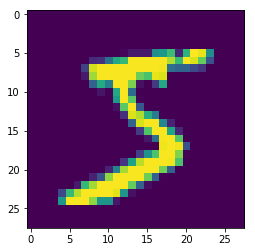

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

The dataset has 60K training and 10K validation samples. Each sample is an image of dimension(28,28,1). The number of labels of the dataset is 10, digits from zero to nine

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Normalise the pixel values to get values between 0 and 1

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train[:1,12:14,12:14,:])

[[[[0.74509805]
   [0.99215686]]

  [[0.13725491]
   [0.94509804]]]]


In [7]:
print(X_train.shape, X_test.shape)
y_train[:10]

(60000, 28, 28, 1) (10000, 28, 28, 1)


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

One hot encoding the labels from training and test set. Each 1d label is converted to 10d sparse matrix. Eg, digit 2 becomes [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Build the CNN model. 
First 3 layers of convolution with (3,3) kernel gives global receptive field of 6 and output size is (22,22)
After max pooling, receptive field is 12 and output size is (11,11)
After this there are 5 layers of convolution with (3,3) kernel gives receptive field of 22 and output size is (1,1) or 1 pixel.
So we are covering  receptive field of 22 for image size (28,28) 

In [9]:
model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))

# After 3 layers, receptive field is 6.

model.add(MaxPooling2D(pool_size=(2, 2)))    # RF - 12

model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(Convolution2D(1024, 3, 3, activation='relu'))
model.add(Convolution2D(2048, 3, 3, activation='relu'))
model.add(Convolution2D(10, 3, 3, activation='relu')) 


model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

W0728 13:54:55.606281 139717634545536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
W0728 13:54:55.651832 139717634545536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0728 13:54:55.660220 139717634545536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `C

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 1024)        4719616   
__________

Compile and fit the model onto the training set and save the weights after every 2 iterations

In [10]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test), callbacks=[checkpoint])

W0728 13:55:18.357525 139717634545536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0728 13:55:18.391065 139717634545536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.
W0728 13:55:18.638679 139717634545536 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0728 13:5

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 231s 4ms/step - loss: 2.3027 - acc: 0.0985 - val_loss: 2.3026 - val_acc: 0.0980
Epoch 2/10
60000/60000 [==============================] - 223s 4ms/step - loss: 2.3026 - acc: 0.0987 - val_loss: 2.3026 - val_acc: 0.0980

Epoch 00002: val_acc improved from -inf to 0.09800, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/Weights/Session2-02-0.0980.hdf5
Epoch 3/10
60000/60000 [==============================] - 223s 4ms/step - loss: 2.3026 - acc: 0.0987 - val_loss: 2.3026 - val_acc: 0.0980
Epoch 4/10
60000/60000 [==============================] - 223s 4ms/step - loss: 2.3026 - acc: 0.0987 - val_loss: 2.3026 - val_acc: 0.0980

Epoch 00004: val_acc did not improve from 0.09800
Epoch 5/10
60000/60000 [==============================] - 223s 4ms/step - loss: 2.3026 - acc: 0.0987 - val_loss: 2.3026 - val_acc: 0.0980
Epoch 6/10
60000/60000 [==============================] - 223s 

Evaluate the model on the validation set (Internally the predicted values are calculated and compared with actual values). Score gives the loss and accuracy values.

In [14]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[2.3025851249694824, 0.098]


In [15]:
y_pred = model.predict(X_test)
print(y_pred[:9])
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


#### What is wrong with the above model?
For Imagenet dataset with complexity of 1000 classes, we need to go up and above 512 kernels. For mnist dataset which has only 10 classes, 512 kernels will be an overhead. But in this model we have gone upto 2048 kernels and the number of parameters are ~25million. And the accuracy is stagnant at 9.8% for 10 epochs.
#### Better model
I have created another model below with 32 kernels in each layer. This model has only 61k parameters and runs faster.  The global receptive field in this case is the same as the earlier model of 22. But the accuracy has jumped 10 times to 99%

In [10]:
model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
# After 4 layers, receptive field is 8, image size 20,20

model.add(MaxPooling2D(pool_size=(2, 2)))
# After MP, receptive field is 16, image size 10,10

model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
# At this stage, receptive field is 22, image size 4,4

model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

W0728 14:46:19.370479 140629740308352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
W0728 14:46:19.420651 140629740308352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0728 14:46:19.431665 140629740308352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `C

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 32)          9248      
__________

In [11]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test, Y_test), callbacks=[checkpoint])

W0728 14:47:17.966063 140629740308352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0728 14:47:18.000690 140629740308352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0728 14:47:18.283166 140629740308352 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0728 14:47:18.384846 140629740308352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 33s 551us/step - loss: 0.1690 - acc: 0.9470 - val_loss: 0.0903 - val_acc: 0.9733
Epoch 2/10
60000/60000 [==============================] - 27s 457us/step - loss: 0.0564 - acc: 0.9832 - val_loss: 0.0553 - val_acc: 0.9830

Epoch 00002: val_acc improved from -inf to 0.98300, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/Weights/Session2-02-0.9830.hdf5
Epoch 3/10
60000/60000 [==============================] - 27s 454us/step - loss: 0.0413 - acc: 0.9875 - val_loss: 0.0285 - val_acc: 0.9913
Epoch 4/10
60000/60000 [==============================] - 27s 454us/step - loss: 0.0336 - acc: 0.9895 - val_loss: 0.0316 - val_acc: 0.9905

Epoch 00004: val_acc improved from 0.98300 to 0.99050, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/Weights/Session2-04-0.9905.hdf5
Epoch 5/10
60000/60000 [==============================] - 27s 455us/step - loss: 0.0279 - acc: 0.99

In [12]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03474900349657264, 0.9905]
